## 452 Assignment 4
Shaolong (Fred) Xue

In [109]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split , KFold, cross_val_score
from sklearn.preprocessing import Normalizer, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

### Question 1
Using "hotel_cancellation.csv", write code to estimate the treatment effects if a ‘different room is assigned’ as the treatment indicator and interpret its effect on the room being ‘canceled’. Use all the other columns as the covariates. Write your observations for the results.

In [2]:
hotel = pd.read_csv('hotel_cancellation.csv')

In [17]:
## set boolean factors for appropriate variables
hotel['diff_room'] = (hotel['different_room_assigned'] == True).astype(int)
hotel['canceled'] = (hotel['is_canceled'] == True).astype(int)

## drop NAs
hotel = hotel.dropna().reset_index()

## drop original factor variables
hotel1 = hotel.drop(['different_room_assigned', 'is_canceled'], axis=1)

In [23]:
hotel1.head(10)

,index,Unnamed: 0,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,days_in_waiting_list,diff_room,canceled
0,0,3,13,2015,27,1,0,0,0
1,1,4,14,2015,27,1,0,0,0
2,2,5,14,2015,27,1,0,0,0
3,3,7,9,2015,27,1,0,0,0
4,4,8,85,2015,27,1,0,0,1
5,5,9,75,2015,27,1,0,0,1
6,6,10,23,2015,27,1,0,0,1
7,7,11,35,2015,27,1,0,0,0
8,8,12,68,2015,27,1,0,1,0
9,9,13,18,2015,27,1,0,0,0


In [25]:
y = hotel1['canceled']
x = hotel1[['diff_room', 'Unnamed: 0', 'lead_time', 'arrival_date_year', 
           'arrival_date_week_number', 'arrival_date_day_of_month', 'days_in_waiting_list']]

In [27]:
model1 = sm.Logit(y, x)
result1 = model1.fit()
print(result1.params)

Optimization terminated successfully.
         Current function value: 0.546866
         Iterations 7
diff_room                   -2.856150
Unnamed: 0                  -0.000022
lead_time                    0.005796
arrival_date_year            0.000288
arrival_date_week_number    -0.008426
arrival_date_day_of_month    0.000787
days_in_waiting_list         0.000349
dtype: float64


The estiamted treatment effect of whether a different room is assigned on whether a reservation is canceled is -2.856. 

To interpret, this is the difference in the odds of cancellation between having a different room assigned and not assigned, while controlling for all other covariates in the model here. 

In [31]:
## reverting the log to interpret
1 - math.exp(-2.85615)

0.9425103300291973

Specifically, it shows that having a different room assigned is associated with a 94.25% reduction in the cancellation of a hotel reservation. 

### Question 2
For "hotel_cancellation.csv", now use double logistic regression to measure the effect of ‘different room is assigned’ on the room being ‘canceled’.

In [34]:
## Double Logistic Regression
model2 = sm.Logit(y, x).fit()
y_hat = np.array(model2.predict(x)).reshape(len(x), 1)
x_new = np.hstack((x, y_hat))
model3 = sm.Logit(y, x_new).fit()
print(model3.params)

Optimization terminated successfully.
         Current function value: 0.546866
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541502
         Iterations 9
x1    -9.274061
x2    -0.000081
x3     0.021294
x4     0.004149
x5    -0.029925
x6     0.002702
x7     0.001373
x8   -12.476351
dtype: float64


### Question 3
Use bootstrap to estimate the standard error of the treatment effects measured in (2).

In [35]:
n_samples = 1000
treat_effects = np.zeros((n_samples, model3.params.shape[0] - 1))

In [36]:
i = 0
while i < n_samples:
    resample_index = np.random.choice(hotel1.index, size = hotel1.index.size, replace = True)
    resample = hotel1.iloc[resample_index]
    x_resample = x.iloc[resample_index]
    y_resample = y.iloc[resample_index]
    model4 = sm.Logit(y_resample, x_resample).fit()
    y_hat = np.array(model4.predict(x_resample)).reshape(len(y_hat), 1)
    x_new = np.hstack((x_resample, y_hat))
    model5 = sm.Logit(y_resample, x_new).fit()
    treat_effects[i, :] = model5.params[:-1]
    i += 1

Optimization terminated successfully.
         Current function value: 0.547553
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542929
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541841
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.550320
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.544451
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.544855
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.539648
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.548403
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542568
  

Optimization terminated successfully.
         Current function value: 0.542471
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546364
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540884
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547538
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542326
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547846
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542887
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.549661
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.544230
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546931
  

Optimization terminated successfully.
         Current function value: 0.547847
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542833
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.548309
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542025
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545500
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540311
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545797
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.539988
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545528
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540754
  

Optimization terminated successfully.
         Current function value: 0.546170
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547423
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541855
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.549127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.543496
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.548782
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.543216
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546000
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540848
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545397
  

Optimization terminated successfully.
         Current function value: 0.546217
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540984
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547468
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541207
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.548388
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542998
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545851
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540445
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.544883
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.539343
  

Optimization terminated successfully.
         Current function value: 0.540977
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545000
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.538889
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546805
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541878
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546328
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541338
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.548081
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542167
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.549220
  

Optimization terminated successfully.
         Current function value: 0.546450
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541215
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547513
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542265
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546895
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540667
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547289
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541484
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545557
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540036
  

Optimization terminated successfully.
         Current function value: 0.541772
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.548682
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.543356
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547268
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541310
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.542936
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.537608
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546666
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540896
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.548464
  

Optimization terminated successfully.
         Current function value: 0.546084
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540752
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547424
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541485
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.548655
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.543681
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547466
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542271
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545884
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540125
  

Optimization terminated successfully.
         Current function value: 0.541906
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545976
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540311
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546851
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542423
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545244
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.539949
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547717
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542584
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545777
  

Optimization terminated successfully.
         Current function value: 0.547817
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.543198
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.543266
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.537176
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547080
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541950
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546464
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540958
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547901
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.543219
  

Optimization terminated successfully.
         Current function value: 0.540349
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.544795
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.539645
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546426
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540495
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545383
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.539952
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.548902
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542252
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545515
  

Optimization terminated successfully.
         Current function value: 0.546704
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541338
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546459
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541120
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.549207
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542978
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.548638
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.543506
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545976
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540559
  

Optimization terminated successfully.
         Current function value: 0.540273
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545216
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.539544
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546908
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541900
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.548105
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542459
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545609
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540454
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.548217
  

Optimization terminated successfully.
         Current function value: 0.547324
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.543277
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547432
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542123
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547519
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542229
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545503
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.539342
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547725
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541761
  

Optimization terminated successfully.
         Current function value: 0.541584
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546737
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540773
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545762
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540189
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546943
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541360
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547963
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.543513
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545262
  

Optimization terminated successfully.
         Current function value: 0.545568
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540172
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547582
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542358
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547322
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542047
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545933
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.539861
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546349
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540427
  

Optimization terminated successfully.
         Current function value: 0.545929
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540036
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.544783
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.538685
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546618
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541244
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547175
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541949
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546071
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540571
  

Optimization terminated successfully.
         Current function value: 0.544530
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.539047
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546345
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541584
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547589
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541218
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.548055
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542570
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.544988
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.539355
  

Optimization terminated successfully.
         Current function value: 0.538446
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546699
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541630
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545665
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540067
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545961
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540016
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545472
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540751
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545794
  

Optimization terminated successfully.
         Current function value: 0.541527
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547025
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541600
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.549061
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.543858
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.548084
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542425
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.549463
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.545509
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.548252
  

Optimization terminated successfully.
         Current function value: 0.541521
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545143
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540226
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546242
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540855
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547731
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.543657
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.548986
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.542566
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.548034
  

Optimization terminated successfully.
         Current function value: 0.547251
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541977
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546860
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541614
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546100
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540905
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.548851
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.544341
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547399
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541748
  

Optimization terminated successfully.
         Current function value: 0.544144
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.539809
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546655
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541415
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547395
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541963
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.548720
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.544443
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547920
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.543082
  

Optimization terminated successfully.
         Current function value: 0.545595
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540700
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.547549
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.543227
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546349
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540161
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545600
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.539871
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.546502
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541542
  

In [39]:
treat_effects_se = treat_effects.std(axis=0)
print("Standard errors of the treatment effects:")
print(treat_effects_se)

Standard errors of the treatment effects:
[4.51699206e-01 3.98277288e-06 9.36922182e-04 2.47692137e-04
 2.26335897e-03 2.96016759e-03 1.63141067e-03]


### Question 4
Use the "drinking.csv" for this question. Keeping 21 as the threshold for age, explore the data with an RDD by writing very simple code (no package needed, just average to one side of the threshold minus average to the other side) to determine if alcohol increases the chances of death by accident, suicide and/or others (the three given columns) and comment on the question “Should the legal age for drinking be reduced from 21?” based on the results. Plot graphs to show the discontinuity (if any) and to show results for the change in chances of death with all the three features (i.e., accident vs age, suicide vs age and others vs age). For this problem, choose the bandwidth to be 1 year (i.e., 21 +- 1). What might be the effect of choosing a smaller bandwidth?  What if we chose the maximum bandwidth?

In [77]:
drinking = pd.read_csv("drinking.csv")
drinking.head()

,age,others,accident,suicide
0,19.068493,92.825401,35.829327,11.203714
1,19.150684,95.100739,35.639256,12.193368
2,19.232876,92.144295,34.205650,11.715812
3,19.315069,88.427757,32.278957,11.275010
4,19.397261,88.704941,32.650967,10.984314


In [64]:
## control group (Age 20-21)
control = drinking[(drinking['age'] >= 20) & (drinking['age'] < 21)]
ctl_suicide_avg = control['suicide'].mean()
ctl_accident_avg = control['accident'].mean()
ctl_others_avg = control['others'].mean()

In [63]:
## treatment group (Age 21-22)
treatment = drinking[(drinking['age'] >= 21) & (drinking['age'] <= 22)]
trm_suicide_avg = treatment['suicide'].mean()
trm_accident_avg = treatment['accident'].mean()
trm_others_avg = treatment['others'].mean()

In [65]:
## treatment effect on suicides
trm_suicide_avg - ctl_suicide_avg

1.7190783333333357

In [66]:
## treatment effect on accidents
trm_accident_avg - ctl_accident_avg

1.3384858333333405

In [67]:
## treatment effect on others
trm_others_avg - ctl_others_avg

6.5416600833333405

Based on these simple averages, at 21+-1 threshold, being able to drink associates with increased mortality rate from susicide, accidents, or others. 

<AxesSubplot: xlabel='age_centered', ylabel='others'>

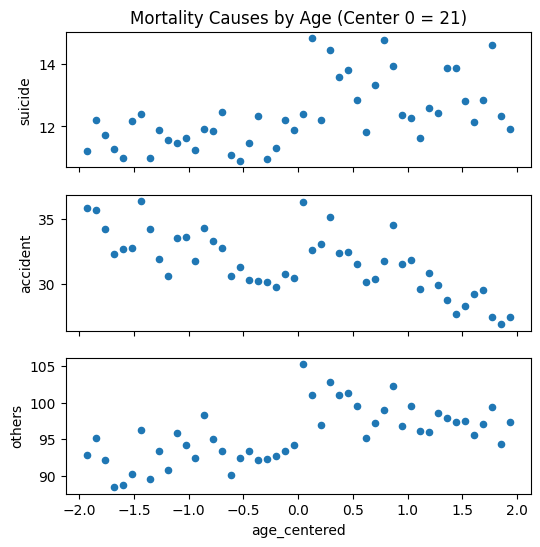

In [83]:
## plotting the discontinuity effect
drinking['age_centered'] = drinking['age'] - 21

plt.figure(figsize=(6,6))
ax = plt.subplot(3,1,1)
drinking.plot.scatter(x = "age_centered", y = "suicide", ax=ax)
plt.title("Mortality Causes by Age (Center 0 = 21)")

ax = plt.subplot(3,1,2, sharex=ax)
drinking.plot.scatter(x = "age_centered", y = "accident", ax=ax)

ax = plt.subplot(3,1,3, sharex=ax)
drinking.plot.scatter(x = "age_centered", y = "others", ax=ax)

#### Choosing the bandwidth

If we choose too small of a bandwidth, we may not capture the true treatment effect because there will be limited obversations in a very small margin. 

If we choose the maximum bandwidth (include everything), we will be doing a difference-in-means estimation. This may not accurately capture the treatment effect since there may be other variations in the rest of the data. 

### Question 5
Use the iris.csv, for this question. How does the performance of k-nearest neighbors change as k takes on the following values: 1, 3, 5, 7? Which of these is the optimal value of k? Which distance/similarity metric did you choose to use and why?

In [95]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [96]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [97]:
iris.groupby('variety').size()

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

In [103]:
## define predictors and response
x_columns = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
x = iris[x_columns].values
y = iris['variety'].values

In [106]:
## encode species label
le = LabelEncoder()
y = le.fit_transform(y)

In [108]:
## train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [121]:
## standardize the data
scaler = Normalizer().fit(x_train)
normalized_x_train = scaler.transform(x_train)
normalized_x_test = scaler.transform(x_test)

In [147]:
## Fit the response to Training Set
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(normalized_x_train, y_train)
y_pred = classifier.predict(normalized_x_test)

In [148]:
## calculate accuracy 
accuracy = accuracy_score(y_test, y_pred)*100
round(accuracy, 4)

96.6667

In [139]:
## run CV for fine tuning
k_list = [1, 3, 5, 7]
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [140]:
cv_scores

[0.9416666666666667,
 0.9583333333333333,
 0.9583333333333333,
 0.9666666666666666]

In [149]:
## calculate MSE
MSE = [1 - x for x in cv_scores]

In [150]:
MSE

[0.05833333333333335,
 0.04166666666666674,
 0.04166666666666674,
 0.03333333333333344]

For k value of 1, 3, 5, and 7, the performance of each kNN increases as k increases. This is shown by the improving model accuracy and decreasing MSE as k gets larger. Based on this the optimal k is 7, given these four choices. 

The distance metric I used within the sklearn packages is the Euclidean distance. It's the ordinary "straight-line" distance between two points in Euclidean space. This is probably the most common approach. It's easy to understand and calculate. It's highly intuitive to interpret as a result. 